<a href="https://colab.research.google.com/github/jbuzzio/DeepLearning/blob/main/ENTREGA_1_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!wget -nc --no-cache -O dataset.zip -q https://github.com/jbuzzio/DeepLearning/raw/main/dataset.zip
!unzip -n -q dataset.zip
!rm dataset.zip

In [43]:
import zipfile
import os
import numpy as np
import sklearn.preprocessing as skpp
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Cargar el dataset

In [42]:
# Ruta a los archivos descomprimidos
npz_file_path = os.path.join('/content/dataset_images.npz')
csv_file_path = os.path.join('/content/dataset_labels.csv')

In [ ]:
# Cargar las imágenes (archivo .npz)
npz_file = np.load(npz_file_path)
images = npz_file['images']  # Las imágenes están en formato de numpy array

In [ ]:
# Cargar las etiquetas (archivo .csv)
labels_df = pd.read_csv(csv_file_path)
labels = labels_df['label'].values  # Etiquetas en formato numpy array

In [ ]:
print(f'Cargadas {images.shape[0]} imágenes y {labels.shape[0]} etiquetas.')

Cargadas 161989 imágenes y 161989 etiquetas.


#Distribución de los datos en el dataset

In [44]:
valores= {}

In [45]:
for i in labels_df['label'].unique():
  valores[i] =len(labels_df[labels_df['label'] == i])

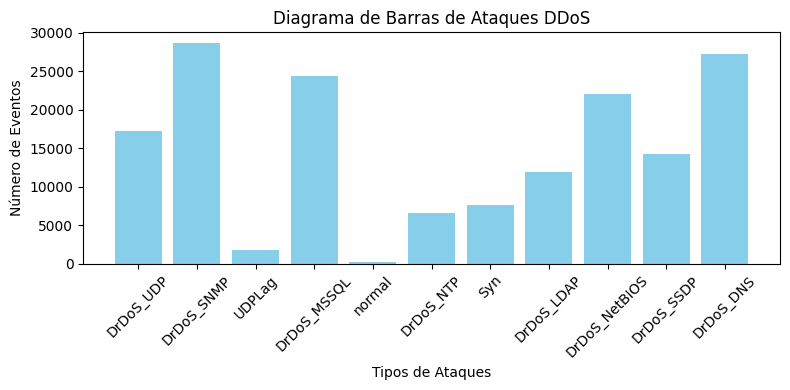

In [51]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(valores.keys(),valores.values(), color='skyblue')
plt.title('Diagrama de Barras de Ataques DDoS')
plt.xlabel('Tipos de Ataques')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar el diseño
plt.show()


#Obtener una muestra del dataset
El dataset tiene en total 161898 elementos. Sin embargo, google colab no soporta cargar tantas imagenes por falta de memoria RAM. Por este motivo, para esta primera fase, se toma una muestra del dataset para realizar este ejercicio.

In [52]:
# Paso 1: Tomar una muestra aleatoria de las clases, excepto "normal"
def crear_muestra(imagenes, labels_df, tamano_muestra=500, excepcion_clase="normal"):
    imagenes_muestra = []
    labels_muestra = []

    # Recorrer cada clase
    for clase in labels_df['label'].unique():
        indices_clase = labels_df[labels_df['label'] == clase].index

        if clase == excepcion_clase:
            # Si la clase es la excepción (normal), agregar todas las imágenes
            imagenes_muestra.extend(imagenes[indices_clase])
            labels_muestra.extend(labels_df.iloc[indices_clase].values)
            print(f'Agregado {len(indices_clase)} imágenes de la clase "{clase}"')

        else:
            # Seleccionar una muestra aleatoria de la clase
            tamano_muestra_real = min(len(indices_clase), tamano_muestra)
            muestra_indices = random.sample(list(indices_clase), tamano_muestra_real)

            imagenes_muestra.extend(imagenes[muestra_indices])
            labels_muestra.extend(labels_df.iloc[muestra_indices].values)
            print(f'Seleccionado {tamano_muestra_real} imágenes de la clase "{clase}"')

    imagenes_muestra = np.array(imagenes_muestra)
    labels_muestra = pd.DataFrame(labels_muestra, columns=labels_df.columns)

    return imagenes_muestra, labels_muestra

In [53]:
# Crear la muestra
imagenes_muestra, labels_muestra = crear_muestra(images, labels_df, tamano_muestra=1000, excepcion_clase="normal")

Seleccionado 1000 imágenes de la clase "DrDoS_UDP"
Seleccionado 1000 imágenes de la clase "DrDoS_SNMP"
Seleccionado 1000 imágenes de la clase "UDPLag"
Seleccionado 1000 imágenes de la clase "DrDoS_MSSQL"
Agregado 174 imágenes de la clase "normal"
Seleccionado 1000 imágenes de la clase "DrDoS_NTP"
Seleccionado 1000 imágenes de la clase "Syn"
Seleccionado 1000 imágenes de la clase "DrDoS_LDAP"
Seleccionado 1000 imágenes de la clase "DrDoS_NetBIOS"
Seleccionado 1000 imágenes de la clase "DrDoS_SSDP"
Seleccionado 1000 imágenes de la clase "DrDoS_DNS"


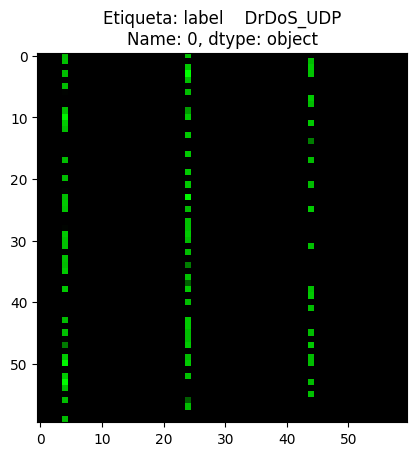

In [61]:
## Mostrar la primera imagen del dataset
# Las imagenes estan en RGB y tienen un tamaño de 60x60
plt.imshow(imagenes_muestra[0])
plt.title(f'Etiqueta: {labels_muestra.iloc[0]}')
plt.show()

# Label encoder

In [70]:
lencoder = skpp.LabelEncoder()
y_muestra = lencoder.fit_transform(labels_muestra)
y_muestra

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([7, 7, 7, ..., 0, 0, 0])

#Division del dataset en entrenamiento y prueba
Utilizamos las imagenes de muestra y no todo el dataset por cuestiones de recursos

In [71]:
#Dividir la muestra en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    imagenes_muestra, y_muestra, test_size=0.2, random_state=42, stratify=labels_muestra['label'])

# Verificar tamaños
print(f"Tamaño de entrenamiento: {len(x_train)}")
print(f"Tamaño de prueba: {len(x_test)}")

Tamaño de entrenamiento: 8139
Tamaño de prueba: 2035


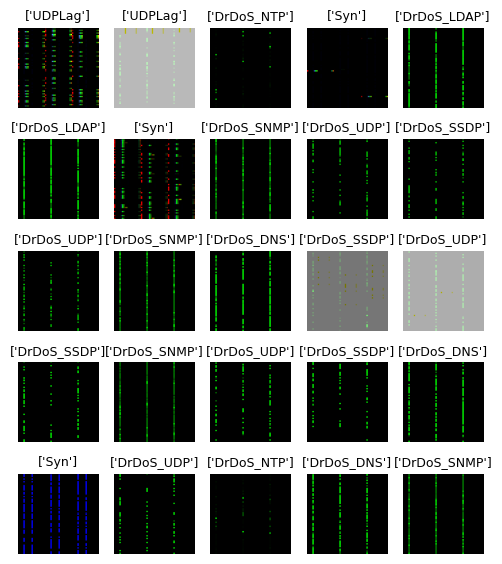

In [72]:
#Visualizamos las primeras 25 imagenes del dataset de entrenamiento
plt.figure(figsize=[6,7])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.axis("off")
  plt.title(lencoder.inverse_transform([y_train[i]]), fontsize=9)
plt.show()

In [73]:
#Hacemos un reshape a las imagenes para que sirvan como entrada de nuestro modelo
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8139, 10800)
(8139,)
(2035, 10800)
(2035,)


#Preparamos la data para el procesamiento

In [75]:
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)

nb_classes = y_trainOHE.shape[1]

In [76]:
y_testOHE = utils.to_categorical(y_test)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#Definimos un modelo simple
Este modelo solo es una primera aproximación

In [78]:
model = Sequential()
model.add(Dense(64, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dense(nb_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │         691,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,707 (2.65 MB)

 Trainable params: 693,707 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# pasar optimizador por nombre: se utilizarán los parámetros por defecto
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [81]:
log = model.fit(X_trainN, y_trainOHE, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Epoch 1/10
458/458 - 3s - 7ms/step - loss: 1.6168 - val_loss: 1.3959
Epoch 2/10
458/458 - 5s - 12ms/step - loss: 1.2853 - val_loss: 1.2422
Epoch 3/10
458/458 - 4s - 9ms/step - loss: 1.1707 - val_loss: 1.2142
Epoch 4/10
458/458 - 2s - 4ms/step - loss: 1.1138 - val_loss: 1.1202
Epoch 5/10
458/458 - 3s - 5ms/step - loss: 1.0671 - val_loss: 1.0947
Epoch 6/10
458/458 - 3s - 6ms/step - loss: 1.0532 - val_loss: 1.0762
Epoch 7/10
458/458 - 3s - 7ms/step - loss: 1.0368 - val_loss: 1.0818
Epoch 8/10
458/458 - 3s - 6ms/step - loss: 1.0220 - val_loss: 1.0361
Epoch 9/10
458/458 - 4s - 9ms/step - loss: 1.0153 - val_loss: 1.0257
Epoch 10/10
458/458 - 3s - 5ms/step - loss: 0.9951 - val_loss: 1.0270


In [82]:
preds = np.argmax(model.predict(X_testN), axis=-1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy =  56.16707616707617 %


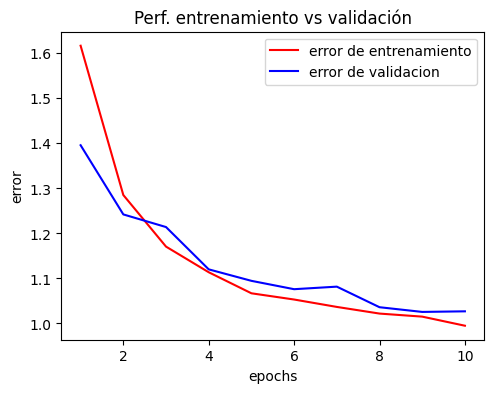

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0248


In [83]:
def MostrarResultados(modelo, log):
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)
  error = log.history["loss"]
  val_error = log.history["val_loss"]
  epochs = range(1,len(error)+1)
  plt.plot(epochs, error, color="red", label="error de entrenamiento")
  plt.plot(epochs, val_error, color="blue", label="error de validacion")
  plt.title("Perf. entrenamiento vs validación")
  plt.xlabel("epochs")
  plt.ylabel("error")
  plt.legend()

  plt.show()
  r = model.evaluate(X_testN, y_testOHE)
MostrarResultados(model, log)